In [2]:
import xarray as xr #Similar ao pandas mas com melhor eficiencia para trabalhar com matrizes multidimensionais, muito bom para dados georref
import numpy as np
from scipy.stats import weibull_min
from py_wake.site.xrsite import XRSite
from py_wake.site.shear import PowerShear
import matplotlib.pyplot as plt
from py_wake.flow_map import XYGrid, YZGrid, XZGrid
from pyproj import Proj, Transformer
from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import pandas as pd
from topfarm.utils import regular_generic_layout, regular_generic_layout_gradients

KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from py_wake.wind_turbines import WindTurbine, WindTurbines

In [ ]:
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import pandas as pd
df=pd.read_csv('2020ATB_NREL_Reference_7MW_200.csv')
ws_turbina= df['Wind Speed [m/s]']
power=df['Power [kW]']
ct= df['Ct [-]']
wt = WindTurbine(
                name='NREL_7MW_200',
                diameter=200,
                hub_height=119,
                powerCtFunction=PowerCtTabular(ws_turbina,power,'kW',ct))


In [ ]:
df

,Wind Speed [m/s],Power [kW],Ct [-]
0,3.00,0,0.000000
1,3.25,168,0.254333
2,3.50,235,0.284844
3,3.75,312,0.307471
4,4.00,400,0.324806
...,...,...,...
84,24.00,7000,0.026315
85,24.25,7000,0.025510
86,24.50,7000,0.024737
87,24.75,7000,0.023995


In [ ]:
f = [0.036, 0.039, 0.052, 0.07, 0.084, 0.064, 0.086, 0.118, 0.152, 0.147, 0.1, 0.052]
A = [9.177, 9.782, 9.532, 9.91, 10.043, 9.594, 9.584, 10.515, 11.399, 11.687, 11.637, 10.088]
k = [2.393, 2.447, 2.412, 2.592, 2.756, 2.596, 2.584, 2.549, 2.471, 2.607, 2.627, 2.326]
wd = np.linspace(0, 360, len(f), endpoint=False)
ti = .1

In [ ]:
Weibull_A = np.array(A)
Weibull_k = np.array(k)
#Configura o  Turbulence intensity - TI, e 
#ti = 0.1 # Desvio padrão da velocidade do vento / Velocidade média do vento
#Gera o vetor de direção "referencia"

site_1 = xr.Dataset(
    data_vars={
        'Sector_frequency': ('wd', f),
        'Weibull_A': ('wd', Weibull_A),
        'Weibull_k': ('wd', Weibull_k),
        'TI': (ti)   #colocar uma lista
    },
    coords={
        'wd': wd,
    }
)

In [ ]:
site_1

<xarray.Dataset> Size: 392B
Dimensions:           (wd: 12)
Coordinates:
  * wd                (wd) float64 96B 0.0 30.0 60.0 90.0 ... 270.0 300.0 330.0
Data variables:
    Sector_frequency  (wd) float64 96B 0.036 0.039 0.052 ... 0.147 0.1 0.052
    Weibull_A         (wd) float64 96B 9.177 9.782 9.532 ... 11.69 11.64 10.09
    Weibull_k         (wd) float64 96B 2.393 2.447 2.412 ... 2.607 2.627 2.326
    TI                float64 8B 0.1

In [ ]:
from py_wake import NOJ
windTurbines = wt
site = XRSite(site_1, shear=PowerShear(h_ref=100))
wfm = NOJ(site, windTurbines)

In [ ]:
imy_4wt_x= [123, 250, 492, 615, 800, 900]
imy_4wt_y= [123, 150, 492, 615, 800, 900]
i4= [0, 1, 2, 3, 4, 5] #Inverte a ordem dos vetores de coordenadas
my_wt4_x= np.array(imy_4wt_x)[i4]
my_wt4_y= np.array(imy_4wt_y)[i4]

In [ ]:
print(my_wt4_x, my_wt4_y)

[123 250 492 615 800 900] [123 150 492 615 800 900]


In [ ]:
simulaçaoResult= wfm(imy_4wt_x, imy_4wt_y)

In [ ]:
simulaçaoResult.aep()

<xarray.DataArray 'AEP [GWh]' (wt: 6, wd: 360, ws: 23)> Size: 397kB
array([[[1.16399817e-05, 2.69852368e-04, 7.24655655e-04, ...,
         8.65538098e-06, 3.50986800e-06, 0.00000000e+00],
        [1.15303792e-05, 2.68761843e-04, 7.22374764e-04, ...,
         8.93812466e-06, 3.63458008e-06, 0.00000000e+00],
        [1.14353114e-05, 2.67656806e-04, 7.20022504e-04, ...,
         9.22869944e-06, 3.76311105e-06, 0.00000000e+00],
        ...,
        [1.21340915e-05, 2.77984970e-04, 7.47042626e-04, ...,
         1.13715359e-05, 4.75403385e-06, 0.00000000e+00],
        [1.19748624e-05, 2.75332533e-04, 7.39743294e-04, ...,
         1.03969953e-05, 4.30330586e-06, 0.00000000e+00],
        [1.18101068e-05, 2.72621458e-04, 7.32280315e-04, ...,
         9.49294044e-06, 3.88940039e-06, 0.00000000e+00]],

       [[1.90583176e-05, 3.21167892e-04, 8.64775829e-04, ...,
         8.65538098e-06, 3.50986800e-06, 0.00000000e+00],
        [1.89971449e-05, 3.20435970e-04, 8.63628407e-04, ...,
         8.93812466e-06, 3.63458008e-06, 0.00000000e+00],
        [1.88883522e-05, 3.19101617e-04, 8.60805326e-04, ...,
         9.22869944e-06, 3.76311105e-06, 0.00000000e+00],
...
         1.13715359e-05, 4.75403385e-06, 0.00000000e+00],
        [8.48167978e-06, 2.52367326e-04, 6.78064994e-04, ...,
         1.03969953e-05, 4.30330586e-06, 0.00000000e+00],
        [8.17114279e-06, 2.48693482e-04, 6.68334282e-04, ...,
         9.49294044e-06, 3.88940039e-06, 0.00000000e+00]],

       [[1.90583176e-05, 3.21167892e-04, 8.64775829e-04, ...,
         8.65538098e-06, 3.50986800e-06, 0.00000000e+00],
        [1.89971449e-05, 3.20435970e-04, 8.63628407e-04, ...,
         8.93812466e-06, 3.63458008e-06, 0.00000000e+00],
        [1.89360074e-05, 3.19702090e-04, 8.62469725e-04, ...,
         9.22869944e-06, 3.76311105e-06, 0.00000000e+00],
        ...,
        [1.95547385e-05, 3.29353451e-04, 8.87338158e-04, ...,
         1.13715359e-05, 4.75403385e-06, 0.00000000e+00],
        [1.93912249e-05, 3.26660820e-04, 8.79918840e-04, ...,
         1.03969953e-05, 4.30330586e-06, 0.00000000e+00],
        [1.92257644e-05, 3.23932522e-04, 8.72398618e-04, ...,
         9.49294044e-06, 3.88940039e-06, 0.00000000e+00]]],
      shape=(6, 360, 23))
Coordinates:
  * ws       (ws) int64 184B 3 4 5 6 7 8 9 10 11 ... 17 18 19 20 21 22 23 24 25
  * wd       (wd) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * wt       (wt) int64 48B 0 1 2 3 4 5
    type     (wt) int64 48B 0 0 0 0 0 0
Attributes:
    Description:  Annual energy production [GWh]

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900'),
  Text(1000.0, 0, '1000')])

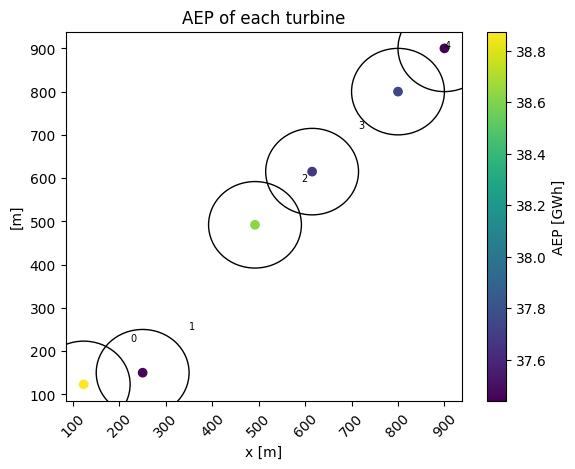

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotando o AEP de cada turbina
plt.figure()
aep = simulaçaoResult.aep()
windTurbines.plot(my_wt4_x, my_wt4_y)
c =plt.scatter(my_wt4_x, my_wt4_y, c=aep.sum(['wd','ws']))
plt.colorbar(c, label='AEP [GWh]')
plt.title('AEP of each turbine')
plt.xlabel('x [m]')
plt.ylabel('[m]')
plt.xticks(rotation=45)

In [ ]:
simulaçaoResult.sel(wt=2)

<xarray.SimulationResult> Size: 346kB
Dimensions:           (wd: 360, ws: 23)
Coordinates:
  * ws                (ws) int64 184B 3 4 5 6 7 8 9 10 ... 19 20 21 22 23 24 25
  * wd                (wd) int64 3kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    wt                int64 8B 2
    type              int64 8B 0
Data variables: (12/17)
    WS_eff            (wd, ws) float64 66kB 3.031 3.871 4.805 ... 24.34 25.44
    TI_eff            (wd, ws) float64 66kB 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    Power             (wd, ws) float64 66kB 2.101e+04 3.547e+05 ... 7e+06 0.0
    CT                (wd, ws) float64 66kB 0.03181 0.3159 ... 0.02523 0.0
    h                 float64 8B 119.0
    x                 int64 8B 492
    ...                ...
    ws_l              (ws) float64 184B 2.5 3.5 4.5 5.5 ... 21.5 22.5 23.5 24.5
    ws_u              (ws) float64 184B 3.5 4.5 5.5 6.5 ... 22.5 23.5 24.5 25.5
    Weibull_A         (wd) float64 3kB 9.177 9.197 9.217 ... 9.268 9.238 9.207
    Weibull_k         (wd) float64 3kB 2.393 2.395 2.397 ... 2.386 2.389 2.391
    Sector_frequency  (wd) float64 3kB 0.0012 0.001203 ... 0.001236 0.001218
    P                 (wd, ws) float64 66kB 6.15e-05 8.565e-05 ... 2.45e-08

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
u = [0,3,12,25,30]
ct = [0,8/9,8/9,.3, 0]
power = [0,0,2000,2000,0]

my_wt = WindTurbine(name='MyWT',
                    diameter=123,
                    hub_height=321,
                    powerCtFunction=PowerCtTabular(u,power,'kW',ct))

In [ ]:
wfm_1=NOJ(site, my_wt)

In [ ]:
simulaçaoResult_1= wfm_1(imy_4wt_x, imy_4wt_y)

In [ ]:
simulaçaoResult_1.aep()

<xarray.DataArray 'AEP [GWh]' (wt: 6, wd: 360, ws: 23)> Size: 397kB
array([[[4.44281337e-05, 2.49219584e-04, 5.40471223e-04, ...,
         2.05498168e-06, 6.07947726e-07, 1.46129497e-07],
        [4.42855300e-05, 2.48651628e-04, 5.39754103e-04, ...,
         2.12211137e-06, 6.29549229e-07, 1.51753986e-07],
        [4.41293205e-05, 2.48056690e-04, 5.38990466e-04, ...,
         2.19119473e-06, 6.51840787e-07, 1.57574677e-07],
        ...,
        [4.55853741e-05, 2.55571408e-04, 5.54572322e-04, ...,
         2.69985780e-06, 8.23450930e-07, 2.04488355e-07],
        [4.52041965e-05, 2.53481982e-04, 5.49935366e-04, ...,
         2.46848000e-06, 7.45379887e-07, 1.83129176e-07],
        [4.48184804e-05, 2.51364880e-04, 5.45235346e-04, ...,
         2.25383709e-06, 6.73686908e-07, 1.63726377e-07]],

       [[4.44281337e-05, 2.49219584e-04, 5.40471223e-04, ...,
         2.05498168e-06, 6.07947726e-07, 1.46129497e-07],
        [4.42855300e-05, 2.48651628e-04, 5.39754103e-04, ...,
         2.12211137e-06, 6.29549229e-07, 1.51753986e-07],
        [4.41430081e-05, 2.48082153e-04, 5.39029945e-04, ...,
         2.19110035e-06, 6.51812207e-07, 1.57567639e-07],
...
         2.91102279e-06, 8.89009881e-07, 2.21073646e-07],
        [1.73216801e-05, 2.01727537e-04, 4.69813171e-04, ...,
         2.67999694e-06, 8.10393825e-07, 1.99401388e-07],
        [1.46715787e-05, 1.95397175e-04, 4.58607496e-04, ...,
         2.46444293e-06, 7.37766429e-07, 1.79591376e-07]],

       [[4.44281337e-05, 2.49219584e-04, 5.40471223e-04, ...,
         2.05498168e-06, 6.07947726e-07, 1.46129497e-07],
        [4.42855300e-05, 2.48651628e-04, 5.39754103e-04, ...,
         2.12211137e-06, 6.29549229e-07, 1.51753986e-07],
        [4.41430081e-05, 2.48082153e-04, 5.39029945e-04, ...,
         2.19110035e-06, 6.51812207e-07, 1.57567639e-07],
        ...,
        [4.55853741e-05, 2.55571408e-04, 5.54572322e-04, ...,
         2.69985780e-06, 8.23450930e-07, 2.04488355e-07],
        [4.52041965e-05, 2.53481982e-04, 5.49935366e-04, ...,
         2.46848000e-06, 7.45379887e-07, 1.83129176e-07],
        [4.48184804e-05, 2.51364880e-04, 5.45235346e-04, ...,
         2.25383709e-06, 6.73686908e-07, 1.63726377e-07]]],
      shape=(6, 360, 23))
Coordinates:
  * ws       (ws) int64 184B 3 4 5 6 7 8 9 10 11 ... 17 18 19 20 21 22 23 24 25
  * wd       (wd) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * wt       (wt) int64 48B 0 1 2 3 4 5
    type     (wt) int64 48B 0 0 0 0 0 0
Attributes:
    Description:  Annual energy production [GWh]

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900'),
  Text(1000.0, 0, '1000')])

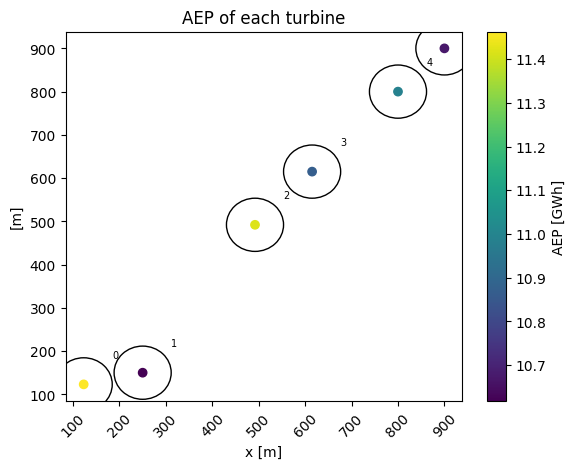

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotando o AEP de cada turbina
plt.figure()
aep = simulaçaoResult_1.aep()
my_wt.plot(my_wt4_x, my_wt4_y)
c =plt.scatter(my_wt4_x, my_wt4_y, c=aep.sum(['wd','ws']))
plt.colorbar(c, label='AEP [GWh]')
plt.title('AEP of each turbine')
plt.xlabel('x [m]')
plt.ylabel('[m]')
plt.xticks(rotation=45)

In [ ]:
from py_wake.wind_farm_models import All2AllIterative
from py_wake.superposition_models import LinearSum
from py_wake.deficit_models import BastankhahGaussianDeficit, SelfSimilarityDeficit

wf_model = All2AllIterative(site,wt,
                            wake_deficitModel=BastankhahGaussianDeficit(use_effective_ws=True))
                            #superpositionModel=LinearSum(),
                            #blockage_deficitModel=SelfSimilarityDeficit())

In [ ]:
x= [123, 250, 492, 615, 800, 900]
y= [123, 150, 492, 615, 800, 900]
simulaçaoResult_2 = wf_model(x, y, wd=30)

In [ ]:
simulaçaoResult_2

<xarray.SimulationResult> Size: 6kB
Dimensions:           (wt: 6, wd: 1, ws: 23)
Coordinates:
  * ws                (ws) int64 184B 3 4 5 6 7 8 9 10 ... 19 20 21 22 23 24 25
  * wt                (wt) int64 48B 0 1 2 3 4 5
  * wd                (wd) int64 8B 30
    type              (wt) int64 48B 0 0 0 0 0 0
Data variables: (12/17)
    WS_eff            (wt, wd, ws) float64 1kB 3.043 3.87 4.807 ... 24.42 25.44
    TI_eff            (wt, wd, ws) float64 1kB 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1
    Power             (wt, wd, ws) float64 1kB 2.919e+04 3.542e+05 ... 7e+06 0.0
    CT                (wt, wd, ws) float64 1kB 0.04419 0.3158 ... 0.02498 0.0
    h                 (wt) float64 48B 119.0 119.0 119.0 119.0 119.0 119.0
    x                 (wt) int64 48B 123 250 492 615 800 900
    ...                ...
    ws_l              (ws) float64 184B 2.5 3.5 4.5 5.5 ... 21.5 22.5 23.5 24.5
    ws_u              (ws) float64 184B 3.5 4.5 5.5 6.5 ... 22.5 23.5 24.5 25.5
    Weibull_A         float64 8B 9.782
    Weibull_k         float64 8B 2.447
    Sector_frequency  float64 8B 0.468
    P                 (ws) float64 184B 0.02003 0.02866 ... 5.494e-05 2.276e-05

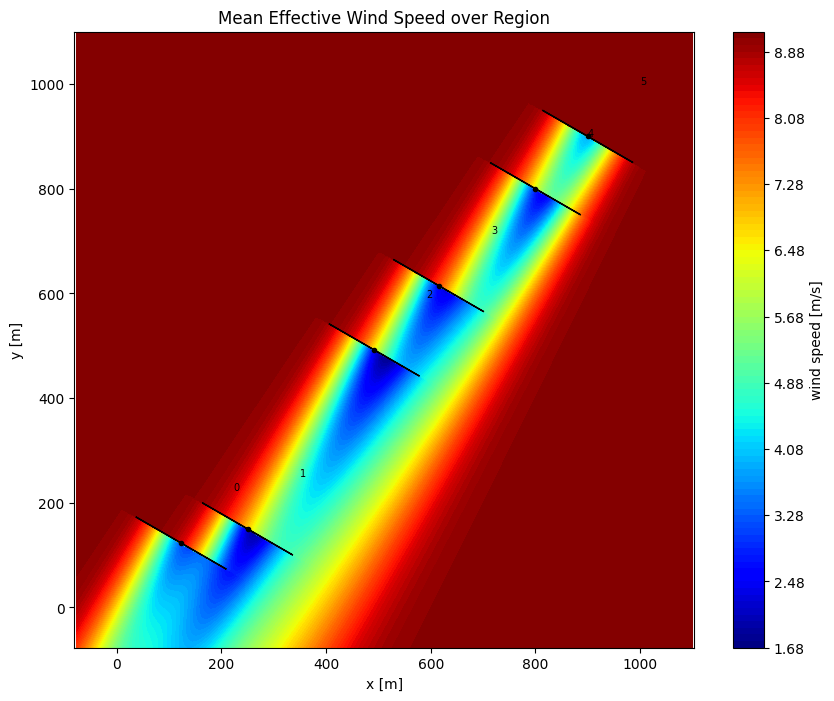

In [ ]:
flow = simulaçaoResult_2.flow_map()
plt.figure(figsize=(10, 8))
flow.plot_wake_map(cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Mean Effective Wind Speed over Region')
plt.show()

---

In [ ]:
f = [0.036, 0.039, 0.052, 0.07, 0.084, 0.064, 0.086, 0.118, 0.152, 0.147, 0.1, 0.052]
A = [9.177, 9.782, 9.532, 9.91, 10.043, 9.594, 9.584, 10.515, 11.399, 11.687, 11.637, 10.088]
k = [2.393, 2.447, 2.412, 2.592, 2.756, 2.596, 2.584, 2.549, 2.471, 2.607, 2.627, 2.326]
wd = np.linspace(0, 360, len(f), endpoint=False)
ti = [2.72, 1.95, 1.98, 2.09, 2.10, 2.05, 2.01, 2.00, 1.95, 1.90, 1.85, 1.80]
ti=[0.1]*12


In [ ]:
Weibull_A = np.array(A)
Weibull_k = np.array(k)
#TI= np.array(ti)
site_2= xr.Dataset(
    data_vars={
        'Sector_frequency': ('wd', f),
        'Weibull_A': ('wd', Weibull_A),
        'Weibull_k': ('wd', Weibull_k),
        'TI': (ti)   #colocar uma lista
    },
    coords={
        'wd': wd,
    }
)

In [ ]:
site_2

<xarray.Dataset> Size: 480B
Dimensions:           (wd: 12, TI: 12)
Coordinates:
  * TI                (TI) float64 96B 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
  * wd                (wd) float64 96B 0.0 30.0 60.0 90.0 ... 270.0 300.0 330.0
Data variables:
    Sector_frequency  (wd) float64 96B 0.036 0.039 0.052 ... 0.147 0.1 0.052
    Weibull_A         (wd) float64 96B 9.177 9.782 9.532 ... 11.69 11.64 10.09
    Weibull_k         (wd) float64 96B 2.393 2.447 2.412 ... 2.607 2.627 2.326

In [ ]:
site_3 = XRSite(site_2, shear=PowerShear(0.2))

In [ ]:
site_3

In [ ]:
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
u = [0,3,12,25,30]
ct = [0,8/9,8/9,.3, 0]
power = [0,0,2000,2000,0]

my_wt_2 = WindTurbine(name='MyWT',
                    diameter=123,
                    hub_height=321,
                    powerCtFunction=PowerCtTabular(u,power,'kW',ct))

In [ ]:
from py_wake.wind_farm_models import All2AllIterative
from py_wake.superposition_models import LinearSum
from py_wake.deficit_models import BastankhahGaussianDeficit, SelfSimilarityDeficit

wf_model_1 = All2AllIterative(site_3,my_wt_2,
                            wake_deficitModel=BastankhahGaussianDeficit(use_effective_ws=True))
                            #superpositionModel=LinearSum(),
                            #blockage_deficitModel=SelfSimilarityDeficit())

In [ ]:
x_2= [123, 250, 492, 615, 800, 900]
y_2= [123, 150, 492, 615, 800, 900]
simulaçaoResult_3 = wf_model_1(x_2, y_2, wd=30)

ValueError: input operand has more dimensions than allowed by the axis remapping

In [ ]:
flow = simulaçaoResult_3.flow_map()
plt.figure(figsize=(10, 8))
flow.plot_wake_map(cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Mean Effective Wind Speed over Region')
plt.show()

NameError: name 'simulaçaoResult_3' is not defined

In [3]:
f = [0.036, 0.039, 0.052, 0.07, 0.084, 0.064, 0.086, 0.118, 0.152, 0.147, 0.1, 0.052]
A = [9.177, 9.782, 9.532, 9.91, 10.043, 9.594, 9.584, 10.515, 11.399, 11.687, 11.637, 10.088]
k = [2.393, 2.447, 2.412, 2.592, 2.756, 2.596, 2.584, 2.549, 2.471, 2.607, 2.627, 2.326]
wd = np.linspace(0, 360, len(f), endpoint=False)
#ti=[0.1]*12
ti = [2.72, 1.95, 1.98, 2.09, 2.10, 2.05, 2.01, 2.00, 1.95, 1.90, 1.85, 1.80]

NameError: name 'np' is not defined

In [ ]:
Weibull_A = np.array(A)
Weibull_k = np.array(k)
#Configura o  Turbulence intensity - TI, e 
#ti = 0.1 # Desvio padrão da velocidade do vento / Velocidade média do vento
#Gera o vetor de direção "referencia"

ds_1 = xr.Dataset(
    data_vars={
        'Sector_frequency': ('wd', f),
        'Weibull_A': ('wd', A),
        'Weibull_k': ('wd', k),
        'TI': ('wd', ti)   #colocar uma lista
    },
    coords={
        'wd': wd,
    }
)

In [ ]:
ds_1

<xarray.Dataset> Size: 480B
Dimensions:           (wd: 12)
Coordinates:
  * wd                (wd) float64 96B 0.0 30.0 60.0 90.0 ... 270.0 300.0 330.0
Data variables:
    Sector_frequency  (wd) float64 96B 0.036 0.039 0.052 ... 0.147 0.1 0.052
    Weibull_A         (wd) float64 96B 9.177 9.782 9.532 ... 11.69 11.64 10.09
    Weibull_k         (wd) float64 96B 2.393 2.447 2.412 ... 2.607 2.627 2.326
    TI                (wd) float64 96B 2.72 1.95 1.98 2.09 ... 1.95 1.9 1.85 1.8

In [ ]:
site_0= XRSite(ds=ds_1, shear=PowerShear(h_ref=100))

In [ ]:
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
u = [0,3,12,25,30]
ct = [0,8/9,8/9,.3, 0]
power = [0,0,2000,2000,0]

my_wt_0 = WindTurbine(name='MyWT',
                    diameter=123,
                    hub_height=321,
                    powerCtFunction=PowerCtTabular(u,power,'kW',ct))

In [ ]:
from py_wake.wind_farm_models import All2AllIterative
from py_wake.deficit_models import BastankhahGaussianDeficit
from py_wake.superposition_models import LinearSum
from py_wake.deficit_models import SelfSimilarityDeficit2020
from py_wake.turbulence_models import STF2017TurbulenceModel
wf_model_0 = All2AllIterative(site_0,my_wt_0,
                            wake_deficitModel=BastankhahGaussianDeficit(use_effective_ws=True),
                            superpositionModel=LinearSum(), 
                            blockage_deficitModel=SelfSimilarityDeficit2020(),
                            turbulenceModel=STF2017TurbulenceModel())

In [ ]:
x_0= [-1250,123, 250, 492, 715, 900, 1200]
y_0= [1750,123, 1600, 492, 715, 939, 1200]
simulaçaoResult_0 = wf_model_0(x_0, y_0, wd=150,ws=10)

In [ ]:
flow_1 = simulaçaoResult_0.flow_map()
plt.figure(figsize=(20,11))  # Increased size for a bigger graphic
flow_1.plot_wake_map(cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Mean Effective Wind Speed over Region')
plt.show()

NameError: name 'simulaçaoResult_0' is not defined

## AEP(Produção anual de energia):
- AEP é a quantidade total acumulada de energia que uma única turbina ou um parque eólico inteiro gerou ao longo de um ano completo.

## Exemplo: Calculo de AEP
O Exemplo abaixo mostra como fazer o calculo de AEP

In [ ]:
from py_wake.examples.data.hornsrev1 import Hornsrev1Site, V80, wt_x, wt_y, wt16_x, wt16_y
from py_wake import NOJ

#here we import the turbine, site and wake deficit model to use.
windTurbines = V80()
site = Hornsrev1Site()
noj = NOJ(site,windTurbines)

In [ ]:
simulationResult = noj(wt16_x,wt16_y)

In [ ]:
simulationResult.aep()

## Exemplo 2: Selecionando uma turbina
- O Exemplo abaixo estamos fazendo o mesmo calculo de AEP feito acima, mas selecionando só uma turbina eolica

In [ ]:
simulationResult.sel(wt=2)

In [ ]:
print(f"Total AEP: {float(simulationResult.Power.sel(wt=2).sum().values)/1e9:.2f} GWh")

## PLOTANDO GRÁFICO DE AEP (UTILIZANDO WT, WD E WS)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotando o AEP de cada turbina
plt.figure()
aep = simulationResult.aep()
windTurbines.plot(wt16_x, wt16_y)
c =plt.scatter(wt16_x, wt16_y, c=aep.sum(['wd','ws']))
plt.colorbar(c, label='AEP [GWh]')
plt.title('AEP of each turbine')
plt.xlabel('x [m]')
plt.ylabel('[m]')
plt.xticks(rotation=45)

#Gráfico AEP vs Velocidade do Vento
plt.figure()
aep.sum(['wt','wd']).plot()
plt.xlabel("Wind speed [m/s]")
plt.ylabel("AEP [GWh]")
plt.title('AEP vs wind speed')
plt.xticks(rotation=45)

#Gráfico AEP vs Direção do Vento
plt.figure()
aep.sum(['wt','ws']).plot()
plt.xlabel("Wind direction [deg]")
plt.ylabel("AEP [GWh]")
plt.title('AEP vs wind direction')
plt.xticks(rotation=45)

#Gráfico wind farm, para visualizar o comportamento de cada turbina
wind_speed = 10
wind_direction = 270

plt.figure()
flow_map = simulationResult.flow_map(ws=wind_speed, wd=wind_direction)
plt.figure(figsize=(18,10))
flow_map.plot_wake_map()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Wake map for' + f' {wind_speed} m/s and {wind_direction} deg')

- O gráfico 1, está mostrando a produção anual de energia de cada turbina e sua posição no site.
- O gráfico 2, mostra o quanto de energia está sendo produzido em determinada velocidade do vento.
- O gráfico 3, sinaliza à direção do vento com maior produção de energia.
- O gráfico 4, faz uma simulação de esfeito esteira no nosso parque e como influência na velocidade de cada turbina.